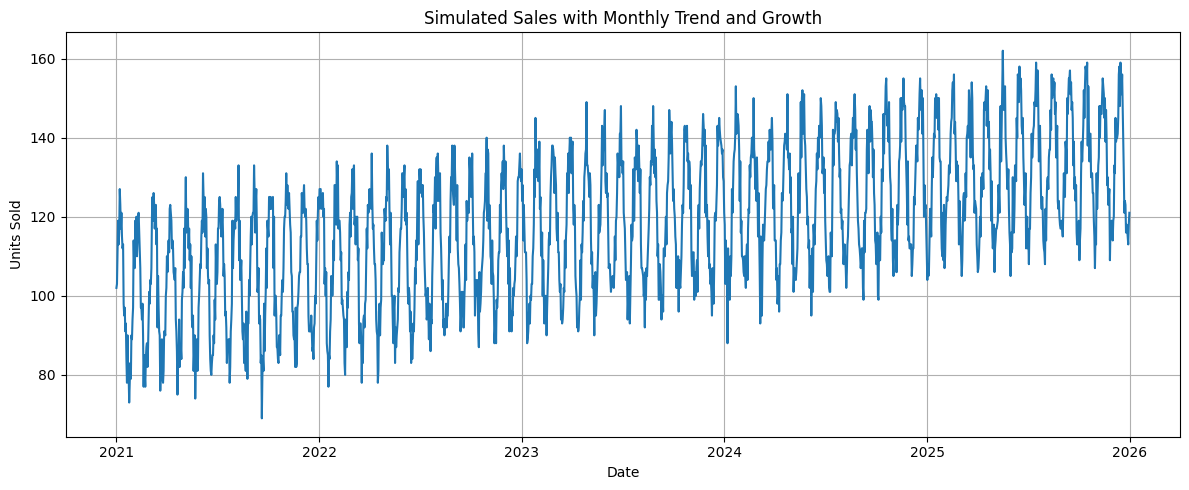

Data saved to 'sales_data.db' in table 'sales'.


In [2]:
import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Parameters
start_date = datetime(2021, 1, 1)
end_date = datetime(2025, 12, 31)
total_days = (end_date - start_date).days + 1
dates = [start_date + timedelta(days=i) for i in range(total_days)]

# Generate sales with seasonal and growth trend
np.random.seed(42)  # reproducibility

# Base sinusoidal pattern for monthly seasonality
days = np.arange(total_days)
monthly_seasonality = 20 * np.sin(2 * np.pi * days / 30)

# Linear trend (steady growth)
growth = 0.02 * days

# Gaussian noise
noise = np.random.normal(loc=0, scale=5, size=total_days)

# Final sales = seasonality + growth + noise + base level
Quantity = 100 + monthly_seasonality + growth + noise
Quantity = np.maximum(Quantity, 0).astype(int)  # ensure non-negative

# Create DataFrame
df = pd.DataFrame({
    "Date": dates,
    "Quantity": Quantity
})

# Plot the trend (optional)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Quantity"], label="Simulated Sales")
plt.title("Simulated Sales with Monthly Trend and Growth")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save to SQLite
conn = sqlite3.connect("sales_data.db")
df.to_sql("sales", conn, if_exists="replace", index=False)
conn.close()

print("Data saved to 'sales_data.db' in table 'sales'.")
